# Q1. Weight-Height

https://drive.google.com/drive/folders/1oPqRIYhcNYlcNpphe7c1wGKTfB8cQVt6?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/CSE4020_ML

/content/gdrive/My Drive/CSE4020_ML


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
data = data.drop(columns=["Gender"]) #get rid of unnecessary data

Plotting the label and features

Text(0, 0.5, 'Height')

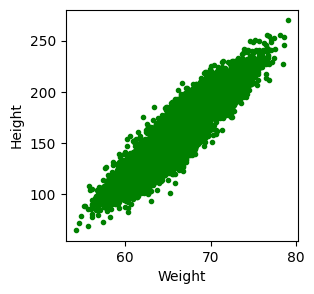

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(data['Height'], data['Weight'], 'g.') # '.' for scatter plot, 'b./r./g.' are colors
plt.xlabel('Weight')
plt.ylabel('Height')

Seperating label and features

In [ ]:
X = data.iloc[:, :-1].values # .iloc is part of pandas; Purely integer-location based indexing for selection by position.
# -1 -> up until the second last column; .values converts it into a numpyarray so that X is an array that only contains selected values

#np.array(data[:,0], dtype=np.float128) - doesn't work

y = data.iloc[:, -1].values
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [ ]:
y

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

Splitting training and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#SYNTAX: sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
X_train

array([[61.39164365],
       [74.6976372 ],
       [68.50781491],
       ...,
       [64.3254058 ],
       [69.07449203],
       [67.58883983]])

In [ ]:
X_test

array([[68.68723219],
       [68.82933377],
       [66.39812838],
       ...,
       [62.18893278],
       [67.06830402],
       [58.63272047]])

In [ ]:
y_train

array([120.68190655, 209.37312588, 200.87727946, ..., 156.80050358,
       179.38681672, 150.38059744])

In [ ]:
y_test

array([173.11581259, 195.1620421 , 170.21745116, ..., 125.17937963,
       187.57349377, 102.46908678])

Linear Regression Model

In [ ]:
class LinearRegression() :
  def __init__(self, epoch, alpha) :
    self.epoch = epoch #epoch = no. of iterations
    self.alpha = alpha

  def modelFit(self, X, y) :
    self.m = len(X) #no. of training features
    self.theta1 = 0 # theta = [0,0] initially
    self.theta0 = 0 #c = bias
    self.X = X #store as attributes to make it more accesible for other methods in the object
    self.y = y

    for i in range(self.epoch) :
      self.gradientDecent()

    return self

  def gradientDecent(self) :
    y_pred = self.theta1 * self.X + self.theta0 #predict the value of y
    self.theta0 = self.theta0 - ((self.alpha/self.m)*np.sum(self.y - y_pred))/self.m
    self.theta1 = self.theta1 - ((self.alpha/self.m)*np.sum((self.y - y_pred)*self.X))/self.m

  def predict(self, X) :
    return X * self.theta1 + self.theta0

    return self #for methods chaining - allows multiple methods to be called on an object in a single line of code using dot notation


Apply Regression. Train and Test Data.

In [ ]:
model = LinearRegression(100, 0.01)
model.modelFit(X_train, y_train)
pred = model.predict(X_test)
print("Predicted values --- ", pred[:3])
print("Real values --- ", y_test[:3])
print("Trained Weight   ", model.theta1)
print("Trained C        ", model.theta0)

Predicted values ---  [[-5.36070455e+167]
 [-5.37179246e+167]
 [-5.18209018e+167]]
Real values ---  [173.11581259 195.1620421  170.21745116]
Trained Weight    -7.802807708592251e+165
Trained C         -1.1719010436066407e+164


Text(0, 0.5, 'Height')

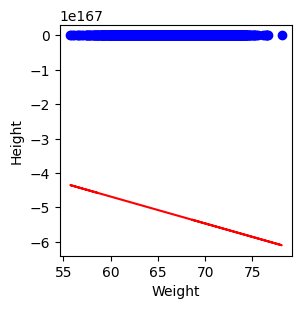

In [ ]:
plt.figure(figsize=(3,3))
plt.scatter(X_test, y_test, color = 'blue' )
plt.plot( X_test, pred, color = 'red' )
plt.xlabel('Weight')
plt.ylabel('Height')

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print( "Predicted values ", np.round(pred[:5], 2 )) #np.round() rounds an array to the given number of decimals
print( "Real values      ", np.round(y_test[:5], 2 ) )

Predicted values  [179.25 180.35 161.62 204.23 166.59]
Real values       [173.12 195.16 170.22 215.05 182.72]


Text(0, 0.5, 'Height')

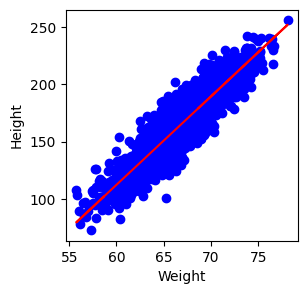

In [ ]:
plt.figure(figsize=(3,3))
plt.scatter(X_test, y_test, color = 'blue' )
plt.plot( X_test, pred, color = 'red' )
plt.xlabel('Weight')
plt.ylabel('Height')

# Q2. House Price Prediction

In [ ]:
df = pd.read_csv("houseprice1.csv")
df.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


Plotting the label and features

Text(0, 0.5, 'SalePrice')

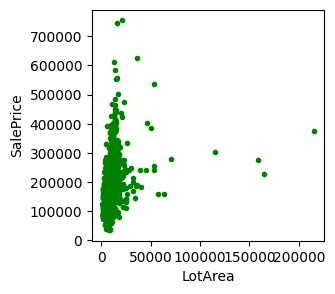

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(df['LotArea'], df['SalePrice'], 'g.')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

Seperating label and features

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X

array([[ 8450],
       [ 9600],
       [11250],
       ...,
       [ 9042],
       [ 9717],
       [ 9937]])

Splitting training and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[8400],
       [7837],
       [8777],
       ...,
       [8172],
       [7642],
       [3684]])

Linear Regression Model

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
class LinearRegression() :
  def __init__(self, epoch, alpha) :
    self.epoch = epoch #epoch = no. of iterations
    self.alpha = alpha
    self.scaler = StandardScaler()

  def modelFit(self, X, y) :
    self.m = len(X) #no. of training features
    self.theta1 = 0 # theta = [0,0] initially
    self.theta0 = 0 #c = bias
    self.X = self.scaler.fit_transform(X)  # Fit and transform the input features
    self.y = y

    for i in range(self.epoch) :
      self.gradientDecent()

    return self

  def gradientDecent(self):
    y_pred = self.theta1 * self.X + self.theta0
    dcost = -np.sum((self.y - y_pred)) / self.m #Computes the partial derivative of the cost function with respect to the weights.
    dc = -np.sum(self.y - y_pred) / self.m #Computes the partial derivative of the cost function with respect to c.
    self.theta0 = self.theta0 - (self.alpha * dcost)
    self.theta1 = self.theta1 - (self.alpha * dc)
    self.theta0 = np.nan_to_num(self.theta0)
    self.theta1 = np.nan_to_num(self.theta1)


  def predict(self, X) :
    X_scaled = self.scaler.transform(X)  # Scale the input features
    return X_scaled * self.theta1 + self.theta0

    return self #for methods chaining - allows multiple methods to be called on an object in a single line of code using dot notation


Apply Regression. Train and Test Data.

In [ ]:
model = LinearRegression(100, 0.001)
model.modelFit(X_train, y_train)
pred = model.predict(X_test)
print("Predicted values --- ", pred[:3])
print("Real values --- ", y_test[:3])
print("Trained Weight   ", model.theta1)
print("Trained C        ", model.theta0)

Predicted values ---  [[143049.60740856]
 [207867.27403841]
 [152261.07174482]]
Real values ---  [154500 325000 115000]
Trained Weight    181441.5419520548
Trained C         181441.5419520548


Text(0, 0.5, 'SalePrice')

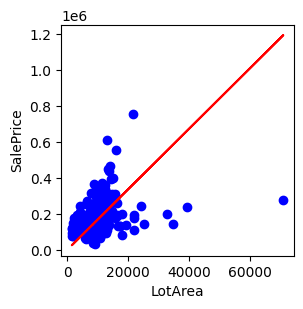

In [ ]:
plt.figure(figsize=(3,3))
plt.scatter(X_test, y_test, color = 'blue' )
plt.plot( X_test, pred, color = 'red' )
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print( "Predicted values ", np.round(pred[:5], 2 )) #np.round() rounds an array to the given number of decimals
print( "Real values      ", np.round(y_test[:5], 2 ) )

Predicted values  [177091.38 184435.83 178135.12 170565.1  185663.09]
Real values       [154500 325000 115000 159000 315500]


Text(0, 0.5, 'SalePrice')

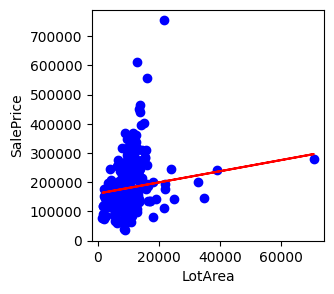

In [ ]:
plt.figure(figsize=(3,3))
plt.scatter(X_test, y_test, color = 'blue' )
plt.plot( X_test, pred, color = 'red' )
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

# Q2. House Price Prediction - Multivariable Regression

In [ ]:
data = pd.read_csv("housePrice.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify columns with non-numeric data
categorical_cols = data.select_dtypes(include=['object']).columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the ColumnTransformer for one-hot encoding
transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough')

# Fit and transform the data with one-hot encoding
data_encoded = transformer.fit_transform(data)

# Get the column names after one-hot encoding
column_names = list(transformer.named_transformers_['one_hot_encoder'].get_feature_names_out(categorical_cols))
column_names += list(numeric_cols)

# Create a new DataFrame from the transformed data with updated column names
data_encoded_df = pd.DataFrame(data_encoded, columns=column_names)

***ColumnTransformer(transformers, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False)***

* *transformers*: This parameter specifies the list of transformers to be applied to the columns of the dataset. It is a list of tuples, where each tuple contains three elements: a name for the transformer, the transformer object itself, and the column names or indices to which the transformer should be applied.
* *remainder*: This parameter determines what to do with the remaining columns that were not specified in the transformers list. It can take the values 'drop' (default), 'passthrough', or a transformer object. 'drop' discards the remaining columns, 'passthrough' leaves them untouched, and a transformer object can be used to transform the remaining columns.


***`column_names = list(transformer.named_transformers_['one_hot_encoder'].get_feature_names_out(categorical_cols))`***

In this line, we're extracting the column names after performing one-hot encoding on the categorical columns. Here's a step-by-step explanation:

1. `transformer.named_transformers_` returns a dictionary that contains the named transformers within the `ColumnTransformer`. In our case, we have one transformer named 'one_hot_encoder'.

2. `transformer.named_transformers_['one_hot_encoder']` retrieves the 'one_hot_encoder' transformer object from the dictionary.

3. `get_feature_names_out(categorical_cols)` is a method specific to the `OneHotEncoder` transformer. It takes the categorical column names (`categorical_cols`) as input and returns the names of the generated one-hot encoded features.

4. `list(...)` converts the returned array of feature names into a list.

So, this line essentially retrieves the column names of the one-hot encoded features and assigns them to the `column_names` variable.

The next line, `column_names += list(numeric_cols)`, adds the names of the numeric columns (`numeric_cols`) to the `column_names` list. This is done to ensure that the final DataFrame, `data_encoded_df`, has the correct column names for all the encoded features, as well as the numeric columns.

By combining the column names from one-hot encoding and the numeric columns, we obtain a comprehensive list of column names that represents all the features in the encoded DataFrame.


When you apply one-hot encoding using the `OneHotEncoder`, the resulting transformed data does not retain the original column names. Instead, it generates new column names based on the unique values present in the categorical columns.

In order to have meaningful column names in the transformed DataFrame, we need to retrieve the new column names from the `OneHotEncoder` transformer. The line `transformer.named_transformers_['one_hot_encoder'].get_feature_names_out(categorical_cols)` retrieves the updated column names for the one-hot encoded categorical columns.

By combining the new column names of the one-hot encoded categorical columns (`column_names`) with the original column names of the numeric columns (`numeric_cols`), we create a comprehensive list of column names for the transformed DataFrame.

Finally, we create a new DataFrame (`data_encoded_df`) using the transformed data (`data_encoded`) and the updated column names. This ensures that the DataFrame has the correct column names for further analysis or modeling.

It's important to have meaningful column names for better interpretation and understanding of the data, especially when working with encoded categorical variables.

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
data_encoded_df[numeric_cols] = numeric_imputer.fit_transform(data_encoded_df[numeric_cols])
data_encoded_df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_nan,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [ ]:
X = data_encoded_df.iloc[:, :-1]
y = data_encoded_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_nan,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,294.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
1066,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,380.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,5.0,2009.0
638,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,328.0,0.0,164.0,0.0,0.0,0.0,0.0,5.0,2008.0
799,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,240.0,0.0,0.0,264.0,0.0,0.0,0.0,0.0,6.0,2007.0
380,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,308.0,0.0,0.0,242.0,0.0,0.0,0.0,0.0,5.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,440.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,3.0,2007.0
1130,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,576.0,431.0,44.0,0.0,0.0,0.0,0.0,0.0,12.0,2009.0
1294,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,572.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0
860,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,216.0,0.0,240.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0


In [ ]:
# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***self.num_features = X.shape[1]***

* X is a NumPy array or matrix that represents the input data for the regression model. The shape of X is accessed using the shape attribute, which returns a tuple representing the dimensions of the array.
* X.shape[1] retrieves the value at index 1 of the shape tuple, which corresponds to the number of columns or features in X.

***np.dot(self.X, self.weights)***

* The dot product operation multiplies the corresponding elements of self.X and self.weights, and then sums them up to obtain a single scalar value.

In [ ]:
class LinearRegression:
    def __init__(self, iterations, learning_rate):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.c = None

    def modelFit(self, X, y):
        m, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.c = 0

        for i in range(self.iterations):
            self.gradientDescent(X, y, m)

        return self

    def gradientDescent(self, X, y, m):
        y_pred = np.dot(X, self.weights) + self.c
        dcost = (1 / m) * np.dot(X.T, (y_pred - y))
        dc = (1 / m) * np.sum(y_pred - y)

        self.weights = self.weights - self.learning_rate * dcost
        self.c = self.c - self.learning_rate * dc

    def predict(self, X):
        return np.dot(X, self.weights) + self.c


In [2]:
import pandas as pd
s1 =pd.siries(data=(31,2,-6),index=[7,9,3,2])
Print(s1)

AttributeError: ignored

In [ ]:
model = LinearRegression(50, 0.01)
model.modelFit(X_train, y_train)
pred = model.predict(X_test)

print("Predicted values ", pred[:3])

print("Real values      ", y_test[:3])

print("Trained Weight   ", model.weights[:3])

print("Trained C        ", model.c)

Predicted values  [nan nan nan]
Real values       892     154500.0
1105    325000.0
413     115000.0
Name: SalePrice, dtype: float64
Trained Weight    [nan nan nan]
Trained C         -1.192810564123411e+303


In [ ]:
# Define the Linear Regression model
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            y_pred = self.predict(X)
            dW = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

# Create an instance of the Linear Regression model
model = LinearRegression(learning_rate=0.1, num_iterations=1000)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Compute the mean squared error
mse = model.mse(y_test, y_pred)

# Print the predicted values, real values, trained weights, trained bias, and mean squared error
print("Predicted values:", y_pred[:3])
print("Real values:", y_test[:3])
print("Trained Weights:", model.weights[:3])
print("Trained Bias:", model.bias)
print("Mean Squared Error:", mse)


Predicted values: [161425.18124663 351798.24897544  84285.82709844]
Real values: 892     154500.0
1105    325000.0
413     115000.0
Name: SalePrice, dtype: float64
Trained Weights: [-1102.83478952  1615.78173474  -389.09884979]
Trained Bias: 181441.54195205471
Mean Squared Error: 804813722.6668674


In [ ]:
class LinearRegression():
    def __init__(self, iterations, learningRate):
        self.iterations = iterations
        self.learningRate = learningRate

    def modelFit(self, X, y):
        self.m = len(X)
        self.num_features = X.shape[1]
        self.weights = np.zeros(self.num_features)
        self.c = 0
        self.X = X
        self.y = y

        for i in range(self.iterations):
            self.gradientDescent()

        return self

    def gradientDescent(self):
        y_pred = np.dot(self.X, self.weights) + self.c
        dcost = -np.dot(self.X.T, (self.y - y_pred)) / self.m
        dc = -np.sum(self.y - y_pred) / self.m
        self.weights = self.weights - self.learningRate * dcost
        self.c = self.c - self.learningRate * dc

    def predict(self, X):
        return np.dot(X, self.weights) + self.c
